In [21]:
!pip install filterpy -q

In [7]:
from numpy.random import randn
import numpy as np

import matplotlib.pyplot as plt

In [13]:
def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos):
    return pos + randn()*500

def gen_train_data(pos, vel, count):
    zs = []
    gts = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        gts.append(pos)
        zs.append(measure_position(pos))
    return np.asarray(zs), np.asarray(gts)

In [14]:
pos, vel = 23.*1000, 15.
zs, gts = gen_train_data(pos, vel, 100)

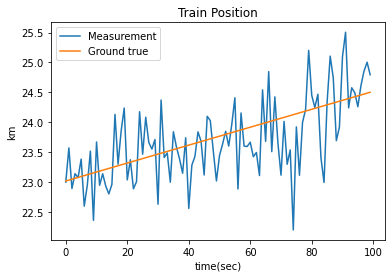

In [20]:
plt.plot(zs / 1000., label='Measurement')
plt.plot(gts / 1000., label='Ground true')

plt.xlabel("time(sec)")
plt.ylabel("km")
plt.title('Train Position')

# Add the legend
plt.legend(loc='upper left')

plt.show()

In [22]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)

In [24]:
f.x = np.array([[pos],    # position
                [vel]])   # velocity

f.F = np.array([[1.,1.],
                [0.,1.]])

f.H = np.array([[1.,0.]])

f.P *= 1000.

f.R = 5

In [25]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [37]:
states = []
for z in zs:
    f.predict()
    f.update(z)
    states.append(f.x)

In [38]:
states_x = np.array([i[0][0] for i in states])

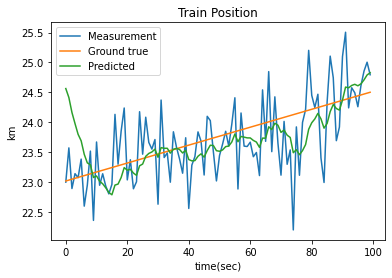

In [39]:
plt.plot(zs / 1000., label='Measurement')
plt.plot(gts / 1000., label='Ground true')
plt.plot(states_x / 1000., label='Predicted')

plt.xlabel("time(sec)")
plt.ylabel("km")
plt.title('Train Position')

# Add the legend
plt.legend(loc='upper left')

plt.show()